# **Recommendation System: Retail Global Fashion Retail Sales**
* Nama     : Wiefran Varenzo
* Email    : lionwiefran88@gmail.com
* Username : Wiefran Varenzo

Proyek ini bertujuan untuk: Melakukan rekomendasi menggunakan metode Content-Based dan Collaborative Filtering yang bertujuan untuk mengefisiensikan penjualan produk fashion untuk retail ataupun e-commerce.

## **1. Memuat Library**

Disini, saya melakukan mengimport pustaka yang dipakai, disini karena saya menggunakan TF-IDF maka library yang dipakai adalah TfidfVectorizer, kemudian, disini juga menggunakan cosine_similarity serta NearestNeighbors. Semua library ini di import di awal agar kode lebih mudah dilihat (library mana yang dipakai)

In [1]:
# Import Library Umum
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

# TensorFlow/Keras
import requests
import zipfile
import io

## **2. Memuat Dataset**

### Gambaran Umum Dataset

Dataset ini diambil dari [Kaggle Repository](https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset?select=transactions.csv) dengan judul:
**Global Fashion Retail Sales

Berikut pembagian atribut ke dalam 4 kelompok dataset yang lebih terpisah dan terstruktur, lengkap dengan **tipe data** tiap kolom:

---

**1. Transaksi (Sales Transaction Dataset)**

| Kolom            | Deskripsi                                           | Tipe Data       |
| ---------------- | --------------------------------------------------- | --------------- |
| Invoice ID       | ID unik untuk transaksi                             | `string`        |
| Line             | Nomor urut item dalam invoice                       | `int`           |
| Customer ID      | ID unik pelanggan                                   | `int`        |
| Product ID       | ID unik produk                                      | `int`        |
| Size             | Ukuran produk (S, M, L, XL, atau kosong)            | `string` null` |
| Color            | Warna produk (versi transaksi)                      | `string`        |
| Unit Price       | Harga satuan produk sebelum diskon                  | `float`         |
| Quantity         | Jumlah unit dibeli                                  | `int`           |
| Date             | Tanggal dan waktu transaksi                         | `string`      |
| Discount         | Diskon (misalnya 0.2 berarti 20%)                   | `float`         |
| Line Total       | Total harga line item setelah diskon                | `float`         |
| Store ID         | ID toko tempat transaksi                            | `int`        |
| Employee ID      | ID karyawan yang memproses transaksi                | `int`        |
| Currency         | Kode mata uang (3 huruf)                            | `string`        |
| Currency Symbol  | Simbol mata uang                                    | `string`        |
| SKU              | Gabungan Product ID, Size, dan Color                | `string`        |
| Transaction Type | Jenis transaksi (Sale, Return)                      | `string`      |
| Payment Method   | Metode pembayaran                                   | `string`      |
| Invoice Total    | Total invoice (sama untuk setiap baris per invoice) | `float64`         |


**2. Pelanggan (Customer Dataset)**

| Kolom         | Deskripsi               | Tipe Data  |
| ------------- | ----------------------- | ---------- |
| Customer ID   | ID unik pelanggan       | `int`      |
| Name          | Nama pelanggan          | `string`   |
| Email         | Email pelanggan         | `string`   |
| Telephone     | Nomor telepon pelanggan | `string`   |
| City          | Kota pelanggan          | `string`   |
| Country       | Negara pelanggan        | `string`   |
| Gender        | Jenis kelamin (F, M, D) | `string`   |
| Date Of Birth | Tanggal lahir pelanggan | `string`   |
| Job Title     | Pekerjaan pelanggan     | `string`   |

**3. Produk (Product Dataset)**

| Kolom           | Deskripsi                   | Tipe Data      |
| --------------- | --------------------------- | -------------- |
| Product ID      | ID unik produk              | `int`       |
| Category        | Kategori produk utama       | `string`       |
| Sub Category    | Subkategori produk          | `string`       |
| Description PT  | Deskripsi produk (Portugis) | `string`       |
| Description DE  | Deskripsi produk (Jerman)   | `string`       |
| Description FR  | Deskripsi produk (Perancis) | `string`       |
| Description ES  | Deskripsi produk (Spanyol)  | `string`       |
| Description EN  | Deskripsi produk (Inggris)  | `string`       |
| Description ZH  | Deskripsi produk (Mandarin) | `string`       |
| Color           | Warna produk (versi produk) | `string`       |
| Sizes           | Ukuran produk yang tersedia | `string`       |
| Production Cost | Biaya produksi dalam USD    | `float`        |

**4. Toko (Store Dataset)**

| Kolom               | Deskripsi                        | Tipe Data |
| ------------------- | -------------------------------- | --------- |
| Store ID            | ID toko                          | `int`  |
| Store Name          | Nama toko                        | `string`  |
| Number of Employees | Jumlah karyawan di toko          | `int`     |
| ZIP Code            | Kode pos toko                    | `string`  |
| City                | Kota toko                        | `string`  |
| Country             | Negara toko                      | `string`  |
| Latitude            | Koordinat lintang toko           | `float`   |
| Longitude           | Koordinat bujur toko             | `float`   |

---

Disini kita harus mengupload file Kaggle.json agar memiliki izin untuk mendownload dari website kaggle, lalu menyambungkan kaggle dengan colab. Setelah tersambung, kode akan memerintahkan untuk mendownload dataset dari kaggle

In [2]:
# Upload Kaggle.json
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download ricgomes/global-fashion-retail-stores-dataset
!mkdir global-fashion-retail-stores-dataset
!unzip global-fashion-retail-stores-dataset.zip -d global-fashion-retail-stores-dataset


Saving kaggle.json to kaggle.json
kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 56% 126M/224M [00:00<00:00, 1.32GB/s]
100% 224M/224M [00:00<00:00, 815MB/s] 
Archive:  global-fashion-retail-stores-dataset.zip
  inflating: global-fashion-retail-stores-dataset/customers.csv  
  inflating: global-fashion-retail-stores-dataset/discounts.csv  
  inflating: global-fashion-retail-stores-dataset/employees.csv  
  inflating: global-fashion-retail-stores-dataset/products.csv  
  inflating: global-fashion-retail-stores-dataset/stores.csv  
  inflating: global-fashion-retail-stores-dataset/transactions.csv  


Disini, saya membuat direktori baru dengan nama global-fashion-retail-stores-dataset, setelah itu hasil download yang berupa zip akan di unsip dan dimasukkan ke direktori global-fashion-retail-stores-dataset

In [3]:
# Muat dataset
customers = pd.read_csv('/content/global-fashion-retail-stores-dataset/customers.csv')
products = pd.read_csv('/content/global-fashion-retail-stores-dataset/products.csv')
stores = pd.read_csv('/content/global-fashion-retail-stores-dataset/stores.csv')
transactions = pd.read_csv('/content/global-fashion-retail-stores-dataset/transactions.csv')

<ipython-input-3-38956d6c9301>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv('/content/global-fashion-retail-stores-dataset/customers.csv')


Saya hanya menggunakan 4 dataset dari 6 dataset, dikarenakan untuk dataset Employees dan Discount tidak terlalu dibutuhkan, sebab yang yang lebih difokuskan disini adalah customer, produk, toko, serta transaksi yang terjadi (dalam hal recommendation system)

## **3. Data Understanding dan EDA (Exploratory Data Analysis)**

### Customer

In [4]:
# Customer
customers.head()

,Customer ID,Name,Email,Telephone,City,Country,Gender,Date Of Birth,Job Title
0,1,Tyler Garcia,tyler.garcia@fake_gmail.com,922.970.2265x47563,New York,United States,M,2003-07-15,NaN
1,2,Joshua Miller,joshua.miller@fake_gmail.com,+1-958-729-6169,New York,United States,M,2000-06-16,Records manager
2,3,Alison Marshall DDS,alison.marshall.dds@fake_hotmail.com,+1-645-567-0876x5409,New York,United States,F,2003-07-22,NaN
3,4,Jeffery Acosta,jeffery.acosta@fake_yahoo.com,212.336.0912x84994,New York,United States,M,1996-11-12,Proofreader
4,5,Ashley Sanders,ashley.sanders@fake_hotmail.com,7814535781,New York,United States,F,1998-02-10,Exercise physiologist


Disini bisa kita lihat, bahwa ada beberapa data NaN, namun untuk bentuk datanya sendiri kebanyakan bertipe string/object yang memiliki informasi mengenai customer dari toko retail fashion

In [5]:
print('Jumlah data pelanggan:', len(customers['Customer ID'].unique()))
customers.info()

Jumlah data pelanggan: 1643306
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Customer ID    1643306 non-null  int64 
 1   Name           1643306 non-null  object
 2   Email          1643306 non-null  object
 3   Telephone      1643306 non-null  object
 4   City           1643306 non-null  object
 5   Country        1643306 non-null  object
 6   Gender         1643306 non-null  object
 7   Date Of Birth  1643306 non-null  object
 8   Job Title      1059121 non-null  object
dtypes: int64(1), object(8)
memory usage: 112.8+ MB


Jumlah pelanggan yang kita miliki informasi berkitar 1643306 orang customer. Lalu, dari informasi yang bisa kita dapatkan, bahwa ada ketidak samaan untuk jumlah data Job Title dibandingkan kolom lainnya. Kemudian, untuk tipe data dari Date Of Birth seharusnya adalah bertipe 'DateTime'

In [6]:
customers.isnull().sum()

,0
Customer ID,0
Name,0
Email,0
Telephone,0
City,0
Country,0
Gender,0
Date Of Birth,0
Job Title,584185


Ternyata memang terdapat data null di kolom Job Title, sebanyak 584185 data null yang nanti harus kita bersihkan

In [7]:
customers.duplicated().sum()

np.int64(0)

Tidak ditemukan adanya data yang duplikat di dataset customers.

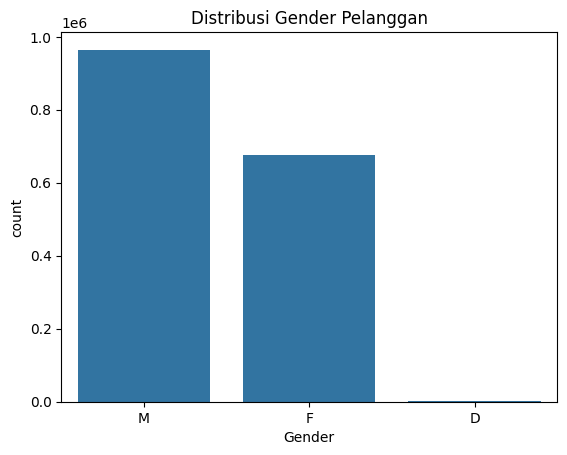

In [8]:
sns.countplot(data=customers, x='Gender')
plt.title("Distribusi Gender Pelanggan")
plt.show()

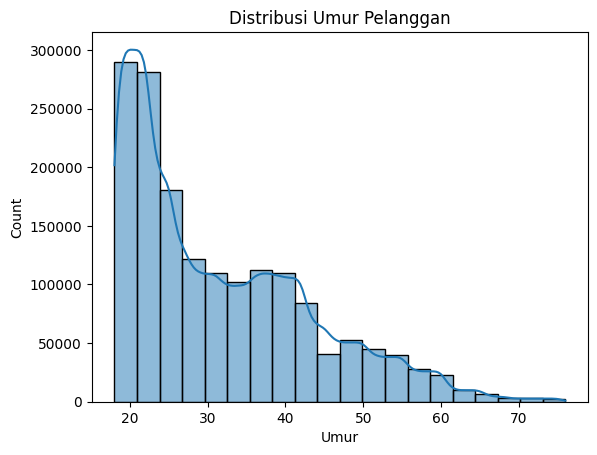

In [9]:
customers['Date Of Birth'] = pd.to_datetime(customers['Date Of Birth'], errors='coerce')
today = pd.to_datetime('today')
customers['Age'] = customers['Date Of Birth'].apply(lambda dob: (today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))) if pd.notnull(dob) else None)

sns.histplot(customers['Age'].dropna(), bins=20, kde=True)
plt.title("Distribusi Umur Pelanggan")
plt.xlabel("Umur")
plt.show()

Dataset ini memiliki data customer bergender M-Male lebih banyak dibandingkan F-Female. Sedangkan Diverse atau selain Wanita atau Pria, itu sangat sedikit.

Distribusi cukup dominan dari kalangan orang mudah yang didominasi umur 20 tahunan

### Products

In [ ]:
# Products
products.head()

,Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
0,1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,NaN,S|M|L|XL,10.73
1,2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55
2,3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L|XL,25.59
3,4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,NaN,S|M|L|XL,27.62
4,5,Feminine,T-shirts and Tops,T-Shirt Básica De Algodão,Basis-Baumwoll-T-Shirt,T-Shirt En Coton De Base,Camiseta Básica De Algodón,Basic Cotton T-Shirt,基本棉T恤,NaN,S|M|L,11.69


Ini adalah Dataset Product, yang merupakan dataset untuk informasi berkaitan dengan produk yang dijual retail fashion di seluruh dunia.

In [ ]:
print('Jumlah Sub Kategori:', len(products['Sub Category'].unique()))
products.info()

Jumlah Sub Kategori: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       17940 non-null  int64  
 1   Category         17940 non-null  object 
 2   Sub Category     17940 non-null  object 
 3   Description PT   17940 non-null  object 
 4   Description DE   17940 non-null  object 
 5   Description FR   17940 non-null  object 
 6   Description ES   17940 non-null  object 
 7   Description EN   17940 non-null  object 
 8   Description ZH   17940 non-null  object 
 9   Color            5495 non-null   object 
 10  Sizes            15870 non-null  object 
 11  Production Cost  17940 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ MB


In [ ]:
products.isnull().sum()

,0
Product ID,0
Category,0
Sub Category,0
Description PT,0
Description DE,0
Description FR,0
Description ES,0
Description EN,0
Description ZH,0
Color,12445


Di color terdapat 12445 data null, serta Sizes terdapat 2070 data null

In [ ]:
products.duplicated().sum()

np.int64(0)

Tidak ditemukan adanya duplikat data di dataset Products

Ini adalah beberapa sub kategori dari produk yang di jual di retail fashion, terdapat 21 sub kategori yang berhubungan dengan pakaian dan juga barang fashion lainnya.  Disini, bisa kita lilhat terdapat beberapa perbedaan jumlah untuk color dan sizes, tetapi hal ini bisa berindikasi pada pemakaian berulang untuk setiap data color dan sizes yang tetap aman berada di dataset

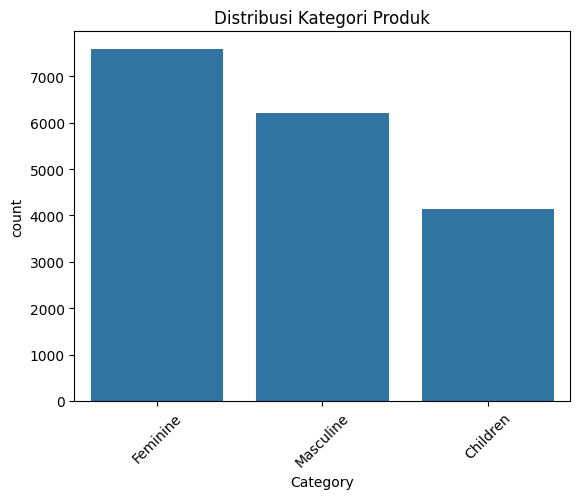

In [ ]:
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kategori Produk")
plt.show()

Kategori dataset ini sendiri ada 3 macam yang di dominasi oleh produk berkategori feminime.

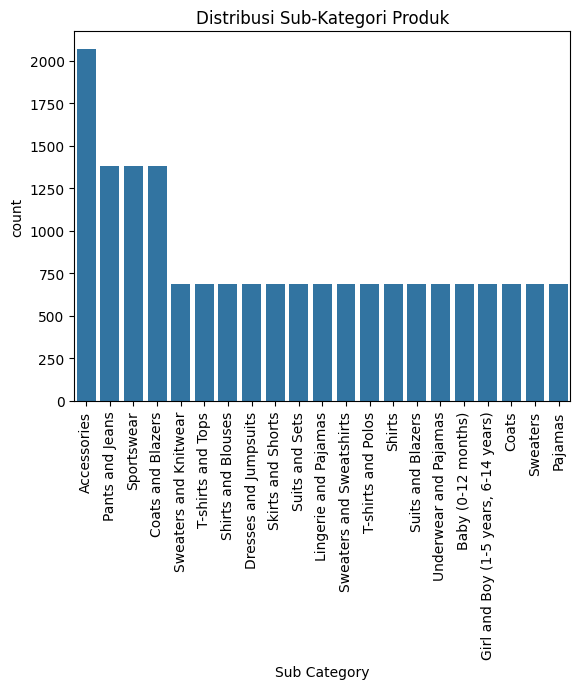

In [ ]:
sns.countplot(data=products, x='Sub Category', order=products['Sub Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribusi Sub-Kategori Produk")
plt.show()

Sub Kategori produk yang paling banyak ditemukan adalah Accesories, lalu diikut oleh Pants and jeans, Sportwear, dan coats and Blazers

### Stores

In [ ]:
# Stores
stores.head()

,Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
0,1,United States,New York,Store New York,10,10001,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,8,90001,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,9,60601,41.8781,-87.6298
3,4,United States,Houston,Store Houston,10,77001,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,9,85001,33.4484,-112.0740


Untuk dataset Stores, lebih mengarah kepada data toko retail seperti dimana negara dan kota toko itu berada, jumlah karyawan, ataupun zip code daerah.

In [ ]:
print('Jumlah Nama Toko:', len(stores['Store Name'].unique()))
stores.info()

Jumlah Nama Toko: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store ID             35 non-null     int64  
 1   Country              35 non-null     object 
 2   City                 35 non-null     object 
 3   Store Name           35 non-null     object 
 4   Number of Employees  35 non-null     int64  
 5   ZIP Code             35 non-null     object 
 6   Latitude             35 non-null     float64
 7   Longitude            35 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ KB


In [ ]:
stores.isnull().sum()

,0
Store ID,0
Country,0
City,0
Store Name,0
Number of Employees,0
ZIP Code,0
Latitude,0
Longitude,0


In [ ]:
stores.duplicated().sum()

np.int64(0)

Tidak ditemukan adanya data duplikat di dataset stores

Sekitar 35 toko yang telah didata. Dari informasi yang diberikan, bisa dilihat bahwa setiap tipe data sudah baik, dan sesuai.

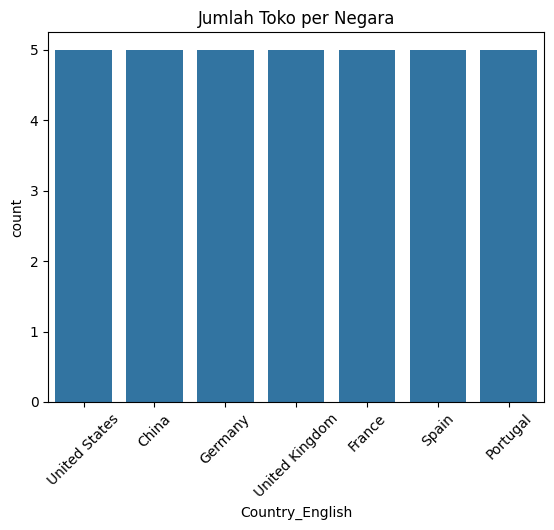

In [ ]:
country_map = {
    'United States': 'United States',
    '中国': 'China',
    'Deutschland': 'Germany',
    'United Kingdom': 'United Kingdom',
    'France': 'France',
    'España': 'Spain',
    'Portugal': 'Portugal'
}
stores['Country_English'] = stores['Country'].map(country_map)
sns.countplot(data=stores, x='Country_English', order=stores['Country_English'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Jumlah Toko per Negara")
plt.show()

Penetapan langsung nama negara dari setiap toko, itu bertujuan agar mengurangi ketidak jelasan pada nama, terutama untuk nama china yang tidak akan dikenali oleh Colab, sehingga secara manual melakukan penamaan negara bisa mengurangi eror yang terjadi pada penamaan.

### Transactions

In [ ]:
transactions.head()

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
0,INV-US-001-03558761,1,47162,485,M,NaN,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.7
1,INV-US-001-03558761,2,47162,2779,G,NaN,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,$,CHCO2779-G-,Sale,Cash,126.7
2,INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,$,MACO64-M-NEUTRAL,Sale,Cash,126.7
3,INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,$,FECO131-M-BLUE,Sale,Cash,77.0
4,INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,6,USD,$,MAT-716-L-WHITE,Sale,Cash,77.0


In [ ]:
print('Jumlah data transaksi berdasarkan Invoice:', len(transactions['Invoice ID'].unique()))
transactions.info()

Jumlah data transaksi berdasarkan Invoice: 4540404
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416827 entries, 0 to 6416826
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Invoice ID        object 
 1   Line              int64  
 2   Customer ID       int64  
 3   Product ID        int64  
 4   Size              object 
 5   Color             object 
 6   Unit Price        float64
 7   Quantity          int64  
 8   Date              object 
 9   Discount          float64
 10  Line Total        float64
 11  Store ID          int64  
 12  Employee ID       int64  
 13  Currency          object 
 14  Currency Symbol   object 
 15  SKU               object 
 16  Transaction Type  object 
 17  Payment Method    object 
 18  Invoice Total     float64
dtypes: float64(4), int64(6), object(9)
memory usage: 930.2+ MB


Penamaan dataset transaksi berkisar 4,5 juta transaksi yang bisa di telaah dengan baik. Perhitungan ini dilakukan dengan menghitung Invoice ID agar bisa secara unik menghitung transaksi yang telah dilakukan. Namun untuk data keseluruhan transaksi adalah 6416827

In [ ]:
transactions.isnull().sum()

,0
Invoice ID,0
Line,0
Customer ID,0
Product ID,0
Size,413102
Color,4350783
Unit Price,0
Quantity,0
Date,0
Discount,0


Terdapat 413102 data size dan 4350783 data color yang null di dataset transactions

In [ ]:
transactions.duplicated().sum()

np.int64(798)

Terdapat 789 data duplikat di dataset transactions

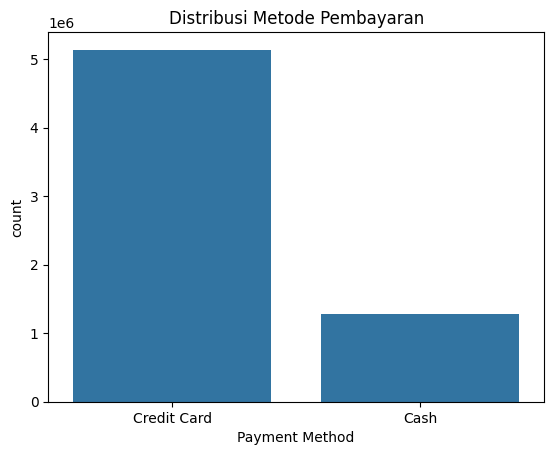

In [ ]:
sns.countplot(data=transactions, x='Payment Method', order=transactions['Payment Method'].value_counts().index)
plt.title("Distribusi Metode Pembayaran")
plt.show()

Untuk distribusi metode pembayaran, credit card disini sangat mendominasi metode pembayaran yang dilakukan. Sedangkan untuk metode pembayaran cash sendiri, tidak sampai 30% dari total pembayaran

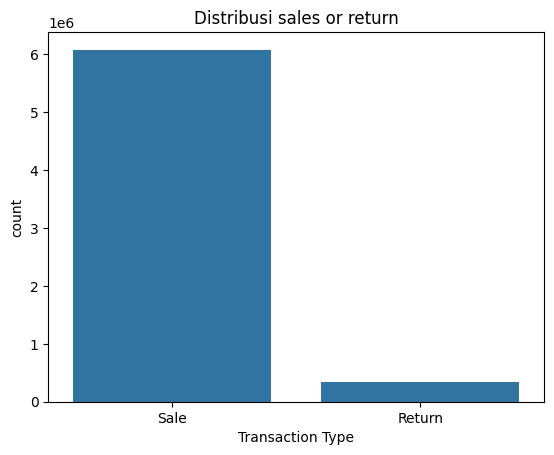

In [ ]:
sns.countplot(data=transactions, x='Transaction Type')
plt.title("Distribusi sales or return")
plt.show()

Lalu, dari grafik ini, bisa kita lihat bahwa barang yang dikembalikan sangat sedikit.

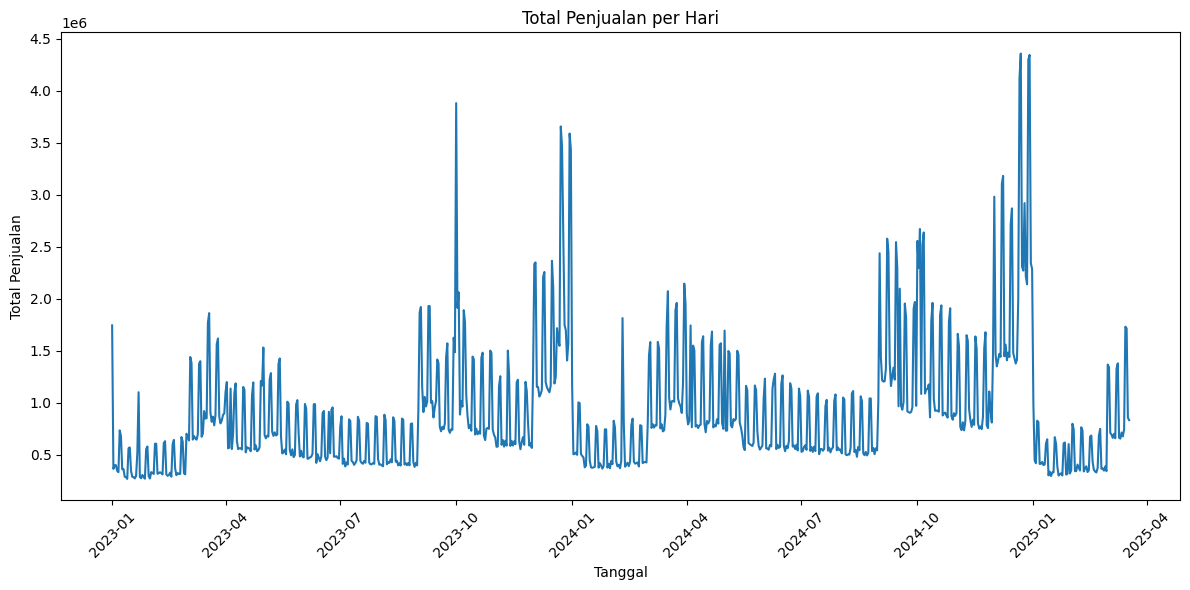

In [ ]:
transactions['Date'] = pd.to_datetime(transactions['Date'])
daily_sales = transactions.groupby(transactions['Date'].dt.date)['Line Total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Date', y='Line Total')
plt.title("Total Penjualan per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kita bisa melihat bahwa terjadi beberapa lonjakan penjualan, terutama untuk yang berdekatan dengan januari (sebelum januari tahun depan) yang mengindikasikan berdekatan dengan natal, penjualan fashion meningkat cukup signifikan

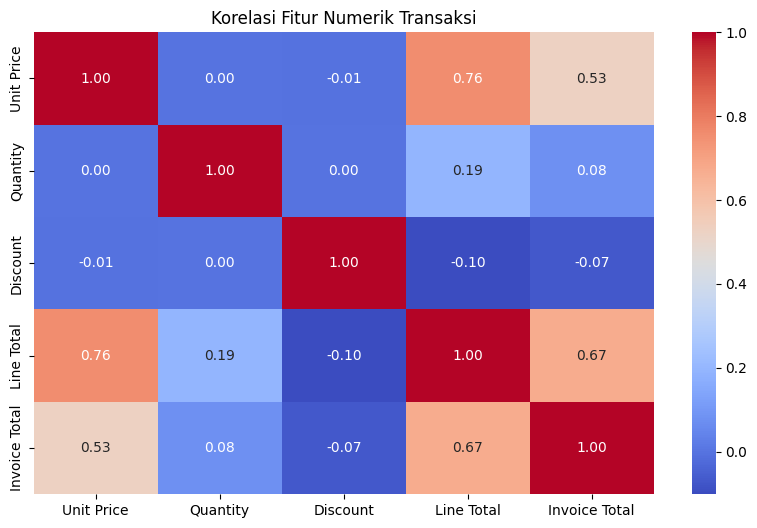

In [ ]:
# Transactions
plt.figure(figsize=(10,6))
corr = transactions[['Unit Price', 'Quantity', 'Discount', 'Line Total', 'Invoice Total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Fitur Numerik Transaksi")
plt.show()

Kita dapat melihat bahwa Unit Price dan Line Total memiliki korelasi positif yang sangat kuat, begitu juga antara Invoice Total dan Line Total. Selain itu, terdapat korelasi yang cukup tinggi antara Invoice Total dan Unit Price.Hal ini mengindikasikan bahwa harga satuan (unit price) memainkan peran penting dalam menentukan nilai total transaksi, baik pada tingkat item (line total) maupun keseluruhan invoice (invoice total). Dengan kata lain, semakin tinggi harga satuan suatu produk, semakin besar kemungkinan total nilai transaksi juga meningkat, terutama jika jumlah pembelian (quantity) dan diskon tetap atau tidak bervariasi secara ekstrem.

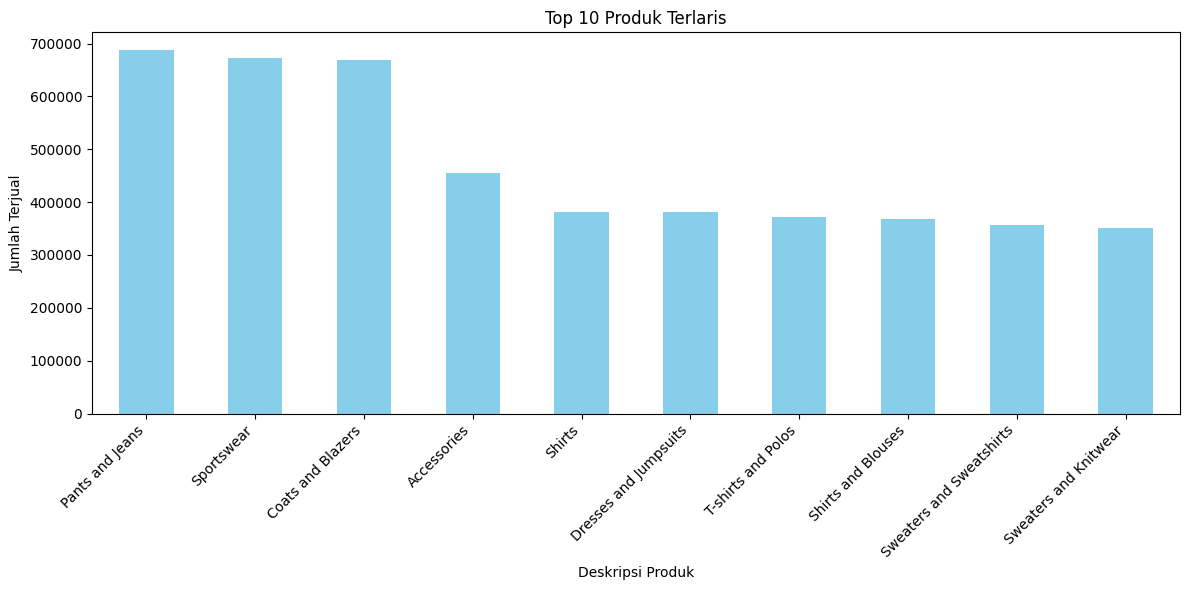

In [ ]:
# Gabungkan transactions dengan products untuk mendapatkan deskripsi produk
transactions_with_desc = transactions.merge(products[['Product ID', 'Sub Category']], on='Product ID', how='left')

# Produk Terlaris berdasarkan Quantity
top_products = (
    transactions_with_desc.groupby('Sub Category')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', title="Top 10 Produk Terlaris", color='skyblue')
plt.xlabel("Deskripsi Produk")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dalam data transaksi ini, kita dapat melihat bahwa terdapat 10 produk terlaris, di antaranya adalah Pants and Jeans, Sportswear, dan lainnya.
Beberapa kategori seperti Dresses and Jumpsuits, T-shirts and Polos, Shirts and Blouses, Sweaters-Sweatshirts, serta Sweaters and Knitwear menunjukkan jumlah penjualan yang hampir setara, yang mengindikasikan bahwa kategori-kategori tersebut memiliki tingkat permintaan yang relatif merata di antara konsumen.



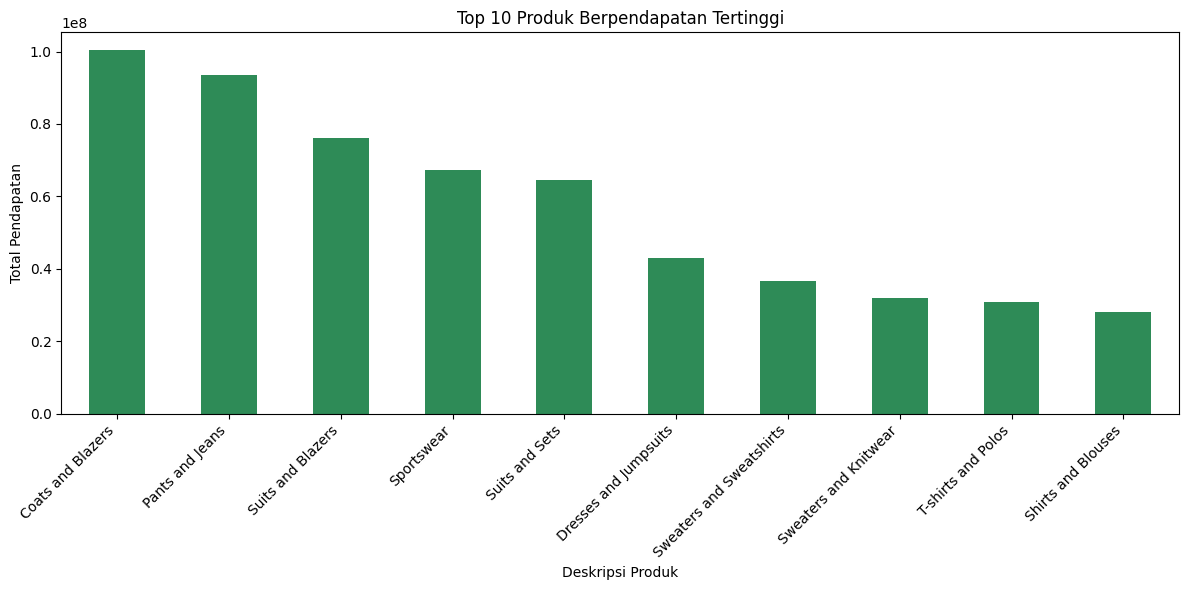

In [ ]:
# Produk dengan Pendapatan Tertinggi berdasarkan Line Total
top_revenue_products = (
    transactions_with_desc.groupby('Sub Category')['Line Total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_revenue_products.plot(kind='bar', title="Top 10 Produk Berpendapatan Tertinggi", color='seagreen')
plt.xlabel("Deskripsi Produk")
plt.ylabel("Total Pendapatan")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Coats and Blazers dan pants-jeans adalah produk yang mendatangkan pendapatan paling tinggi, hal ini bisa terjadi karena memang kedua produk ini terjual paling banyak dari produk lainnya. Namun yang menariknya suits and blazers tidak ada pada top 10 paling banyak terjual, tetapi menjadi top 3 barang yang membawa pendapatan tertinggi. Hal ini bisa dikarenakan harga barang saat terjual jauh lebih tinggi dari produk lainnya.

## **4. Data Preprocessing and Data Preparation**

### Data Preprocessing

#### Mengatasi Data Null dan Data Duplikat

In [ ]:
# Mengatasi Data Null dan Duplikat
customers = customers.dropna(axis=0, how='any').drop_duplicates()
products = products.dropna(axis=0, how='any').drop_duplicates()
stores = stores.dropna(axis=0, how='any').drop_duplicates()
transactions = transactions.dropna(axis=0, how='any').drop_duplicates()

Disini, saya secara langsung untuk setiap dataset saya menghapus data null dan data duplikat, Terutama untuk Transactions.

#### Menggabungkan data menjadi satu dataset

In [ ]:
# Menggabungkan seluruh data berdasarkan ID masing-masing dataset
df = transactions.merge(customers, on='Customer ID', how='inner') \
                .merge(products, on='Product ID', how='inner') \
                .merge(stores, on='Store ID', how='inner')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319446 entries, 0 to 1319445
Data columns (total 46 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Invoice ID           1319446 non-null  object        
 1   Line                 1319446 non-null  int64         
 2   Customer ID          1319446 non-null  int64         
 3   Product ID           1319446 non-null  int64         
 4   Size                 1319446 non-null  object        
 5   Color_x              1319446 non-null  object        
 6   Unit Price           1319446 non-null  float64       
 7   Quantity             1319446 non-null  int64         
 8   Date                 1319446 non-null  object        
 9   Discount             1319446 non-null  float64       
 10  Line Total           1319446 non-null  float64       
 11  Store ID             1319446 non-null  int64         
 12  Employee ID          1319446 non-null  int64         
 1

Disini, saya menggabungkan dataset transactions dengan dataset customers, products, dan stores, yang di merge dengan metode inner join, sehingga yang menggabungkan setiap ID dengan dataset transactions

In [ ]:
print(df.isnull().sum())

Invoice ID             0
Line                   0
Customer ID            0
Product ID             0
Size                   0
Color_x                0
Unit Price             0
Quantity               0
Date                   0
Discount               0
Line Total             0
Store ID               0
Employee ID            0
Currency               0
Currency Symbol        0
SKU                    0
Transaction Type       0
Payment Method         0
Invoice Total          0
Name                   0
Email                  0
Telephone              0
City_x                 0
Country_x              0
Gender                 0
Date Of Birth          0
Job Title              0
Age                    0
Category               0
Sub Category           0
Description PT         0
Description DE         0
Description FR         0
Description ES         0
Description EN         0
Description ZH         0
Color_y                0
Sizes                  0
Production Cost        0
Country_y              0


Dari sini kita bisa melihat bahwa tidak ada data null sama sekali untuk dataset gabungan.

### Data Preparation

#### Data Preparation Untuk Content-Based Filtering

In [ ]:
# Kolom-kolom yang dibutuhkan untuk Content Based Filtering
df_cbf = df[['Product ID', 'Category', 'Sub Category', 'Color_y', 'Sizes', 'Description EN']].copy()
df_cbf = df_cbf.drop_duplicates(subset=['Product ID']).reset_index(drop=True)

Mengambil kolom yang digunakan untuk proses training khusus untuk Content-Based Filtering

In [ ]:
df_cbf['combined_features'] = df_cbf['Category'].astype(str) + ' ' + df_cbf['Sub Category'].astype(str) + ' ' + df_cbf['Color_y'].astype(str) + ' ' + df_cbf['Sizes'].astype(str) + ' ' + df_cbf['Description EN'].astype(str)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_cbf['combined_features'])

Pada sel ini, kita menggabungkan beberapa atribut teks dari data produk seperti kategori, subkategori, warna, ukuran, dan deskripsi ke dalam satu kolom combined_features, lalu menerapkan teknik TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengubah teks tersebut menjadi representasi numerik.

#### Data Preparation Untuk Collaborative Filtering

In [ ]:
# Data untuk Collaborative Filtering
cf_data = df[['Customer ID', 'Product ID', 'Line Total']].copy()
cf_data = cf_data[cf_data['Line Total'] > 0].copy()

#Transformasi Logaritma Natural dan Normalisasi Rating
cf_data['rating'] = np.log1p(cf_data['Line Total'])
scaler = MinMaxScaler()
cf_data['rating'] = scaler.fit_transform(cf_data[['rating']])

#Encoding ID Pelanggan dan Produk
user_ids = cf_data['Customer ID'].unique().tolist()
product_ids = cf_data['Product ID'].unique().tolist()

user2user_encoded = {x: i for i, x in enumerate(user_ids)}
product2product_encoded = {x: i for i, x in enumerate(product_ids)}

cf_data['user'] = cf_data['Customer ID'].map(user2user_encoded)
cf_data['product'] = cf_data['Product ID'].map(product2product_encoded)
num_users = len(user2user_encoded)
num_products = len(product2product_encoded)
cf_data = cf_data[['user', 'product', 'rating']]

Data transaksi disiapkan untuk collaborative filtering dengan terlebih dahulu memilih kolom Customer ID, Product ID, dan Line Total. Transaksi dengan nilai Line Total kurang dari atau sama dengan nol dihapus untuk memastikan hanya data valid yang digunakan. Selanjutnya, nilai Line Total ditransformasi menggunakan logaritma natural (log1p) guna mengurangi skewness, lalu dinormalisasi ke dalam rentang 0–1 menggunakan MinMaxScaler, dan hasilnya disimpan sebagai nilai rating. ID pelanggan dan produk kemudian dikodekan menjadi indeks numerik (user dan product) agar kompatibel dengan algoritma pemodelan. Dataset akhir hanya memuat kolom user, product, dan rating.

## **5. Modeling**

### Content Based Filtering

#### Model Development dengan Content Based Filtering (TF-IDF dan Nearest Neighbors)

In [ ]:
# TF-IDF + Nearest Neighbors
product_id_to_index = pd.Series(df_cbf.index, index=df_cbf['Product ID'])
model = NearestNeighbors(n_neighbors=25, metric='cosine', algorithm='brute')
model.fit(tfidf_matrix)

def get_recommendations_with_similarity(product_id, top_n=5, show_plot=True):
    if product_id not in product_id_to_index:
        return f"Product ID {product_id} not found."
    idx = product_id_to_index[product_id]
    sim_scores = list(enumerate(cosine_similarity(tfidf_matrix[idx], tfidf_matrix)[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommendations = []
    sim_list = []
    for i, score in sim_scores[1:]:
        current_product_id = df_cbf.iloc[i]['Product ID']
        if current_product_id != product_id:
            recommendations.append(df_cbf.iloc[i])
            sim_list.append((current_product_id, score))
        if len(recommendations) == top_n:
            break
    if show_plot:
      plt.figure(figsize=(6, 3))
      sns.barplot(x=list(range(len(sim_list))), y=[s[1] for s in sim_list])
      plt.title(f"TF-IDF Cosine Similarity to Product {product_id}")
      plt.ylabel("Similarity")
      plt.xlabel("Recommendation Rank")
      plt.ylim(0, 1)
      plt.show()
    return pd.DataFrame(recommendations)[['Product ID', 'Category', 'Sub Category', 'Description EN', 'Color_y']]

Model TF-IDF + Nearest Neighbors digunakan untuk merekomendasikan produk berdasarkan kemiripan deskripsi. Setiap Product ID dihubungkan ke indeks dalam matriks TF-IDF, dan model Nearest Neighbors dilatih menggunakan metrik cosine similarity. Fungsi get_recommendations_with_similarity menghitung kemiripan antara produk yang dipilih dan seluruh produk lainnya, lalu mengurutkan hasilnya berdasarkan skor kemiripan tertinggi. Rekomendasi teratas divisualisasikan dalam grafik batang yang menunjukkan tingkat kemiripan tiap produk terhadap produk acuan, dan hasil rekomendasi dikembalikan dalam bentuk tabel berisi detail produk.

#### Model Development dengan Content Based Filtering (TF-IDF dan Latent Semantic Analysis (LSA) - TruncatedSVD)

In [ ]:
# TF-IDF + LSA
lsa = TruncatedSVD(n_components=100)
lsa_matrix = lsa.fit_transform(tfidf_matrix)
similarity_matrix = cosine_similarity(lsa_matrix)
product_id_to_index = pd.Series(df_cbf.index, index=df_cbf['Product ID'])

def get_lsa_recommendations(product_id, top_n=5, show_plot=True):
    if product_id not in product_id_to_index:
        return f"Product ID {product_id} not found."
    idx = product_id_to_index[product_id]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommendations = []
    sim_list = []
    for i, score in sim_scores[1:]:
        if df_cbf.iloc[i]['Product ID'] != product_id:
            recommendations.append(df_cbf.iloc[i])
            sim_list.append((df_cbf.iloc[i]['Product ID'], score))
        if len(recommendations) == top_n:
            break
    if show_plot:
      plt.figure(figsize=(6, 3))
      sns.barplot(x=list(range(len(sim_list))), y=[s[1] for s in sim_list])
      plt.title(f"LSA Similarity to Product {product_id}")
      plt.ylabel("Similarity")
      plt.xlabel("Recommendation Rank")
      plt.show()
    return pd.DataFrame(recommendations)[['Product ID', 'Category', 'Sub Category', 'Description EN', 'Color_y']]

Pendekatan TF-IDF + LSA menggunakan teknik Latent Semantic Analysis untuk mengurangi dimensi matriks TF-IDF dan mengekstraksi hubungan laten antar kata dalam deskripsi produk. Matriks hasil reduksi dihitung cosine similarity-nya untuk menilai kemiripan antar produk. Fungsi get_lsa_recommendations akan mengambil produk acuan, menghitung produk lain yang paling mirip secara semantik, menampilkannya dalam grafik batang, dan mengembalikan daftar rekomendasi produk dengan informasi detailnya.

#### Berikan Rekomendasi Top-N sebagai result untuk masing masing pendekatan

Original Product Description:
 Luxurious Neutral Suede With Hood


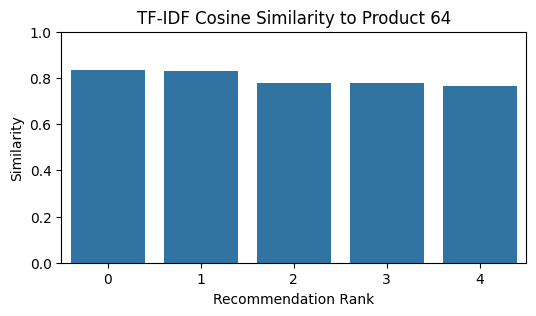


Recommended Products (TF-IDF):
      Product ID   Category       Sub Category  \
3228        9621   Feminine  Coats and Blazers   
1936        7281   Feminine  Coats and Blazers   
3726       11998  Masculine  Coats and Blazers   
4900       14988  Masculine  Coats and Blazers   
107         1494  Masculine  Coats and Blazers   

                            Description EN  Color_y  
3228  Luxurious Neutral Suede With Buttons  NEUTRAL  
1936  Luxurious Neutral Suede With Glitter  NEUTRAL  
3726  Executive Neutral Suede With Glitter  NEUTRAL  
4900       Neutral Suede Boho With Buttons  NEUTRAL  
107   Luxurious Neutral Nylon With Pockets  NEUTRAL  


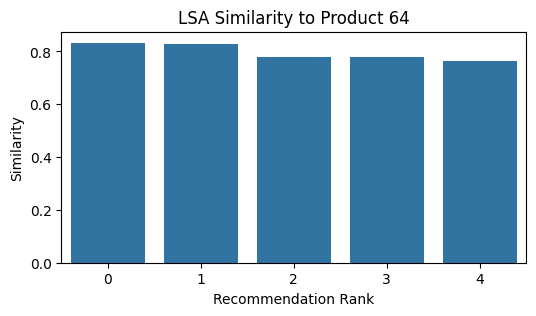


Recommended Products (LSA):
      Product ID   Category       Sub Category  \
3228        9621   Feminine  Coats and Blazers   
1936        7281   Feminine  Coats and Blazers   
3726       11998  Masculine  Coats and Blazers   
4900       14988  Masculine  Coats and Blazers   
107         1494  Masculine  Coats and Blazers   

                            Description EN  Color_y  
3228  Luxurious Neutral Suede With Buttons  NEUTRAL  
1936  Luxurious Neutral Suede With Glitter  NEUTRAL  
3726  Executive Neutral Suede With Glitter  NEUTRAL  
4900       Neutral Suede Boho With Buttons  NEUTRAL  
107   Luxurious Neutral Nylon With Pockets  NEUTRAL  


In [ ]:
# Contoh Penggunaan Rekomendasi
example_id = df_cbf['Product ID'].iloc[0]
print("Original Product Description:\n", df_cbf[df_cbf['Product ID'] == example_id]['Description EN'].values[0])
recs_tfidf = get_recommendations_with_similarity(product_id=example_id, top_n=5, show_plot=True)
print("\nRecommended Products (TF-IDF):")
print(recs_tfidf)
recs_lsa = get_lsa_recommendations(product_id=example_id, top_n=5, show_plot=True)
print("\nRecommended Products (LSA):")
print(recs_lsa)

Kode ini menampilkan contoh penggunaan sistem rekomendasi berbasis konten. Produk pertama dari dataset dipilih sebagai acuan, lalu deskripsinya ditampilkan. Selanjutnya, sistem menghasilkan dua jenis rekomendasi: satu menggunakan pendekatan TF-IDF dan Nearest Neighbors, dan satu lagi dengan TF-IDF yang direduksi menggunakan LSA. Masing-masing fungsi memberikan daftar produk yang paling mirip beserta visualisasi tingkat kemiripan.

### Collaborative Filtering

#### Pembangunan Model Collaborative Filtering (RecommenderNet)

In [ ]:
# RecommenderNet
X = cf_data[['user', 'product']].values
y = cf_data['rating'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Disini saya melakukan pemisahan data training dan testing dimana test_size yang saya ambil adalah 0.2 atau 20% dari total dataset, serta data trainingnya adalah 80%

In [ ]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50, **kwargs):
        super().__init__(**kwargs)
        self.user_embedding = layers.Embedding(input_dim=num_users, output_dim=embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.item_embedding = layers.Embedding(input_dim=num_items, output_dim=embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.dense_1 = layers.Dense(64, activation='relu')
        self.dropout = layers.Dropout(0.2)
        self.out = layers.Dense(1, activation='linear')
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        x = user_vector * item_vector
        x = self.dense_1(x)
        x = self.dropout(x)
        return self.out(x)

Ini adalah Kelas RecommenderNet yang merupakan model deep learning untuk collaborative filtering yang mempelajari interaksi antara pengguna dan produk menggunakan embedding. Model ini memetakan ID pengguna dan produk ke dalam vektor berdimensi rendah, kemudian mengalikan keduanya secara elemen untuk menangkap hubungan interaktif. Hasilnya diproses melalui layer dense dan dropout sebelum menghasilkan prediksi skor atau rating melalui layer output linear.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
model = RecommenderNet(num_users, num_products, embedding_size=50)
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stop, reduce_lr])

Epoch 1/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 0.0328 - root_mean_squared_error: 0.1768 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1504 - learning_rate: 5.0000e-04
Epoch 2/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 0.0203 - root_mean_squared_error: 0.1418 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1211 - learning_rate: 5.0000e-04
Epoch 3/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - loss: 0.0089 - root_mean_squared_error: 0.0909 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1134 - learning_rate: 5.0000e-04
Epoch 4/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - loss: 0.0053 - root_mean_squared_error: 0.0667 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1116 - learning_rate: 5.0000e-04
Epoch 5/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 0.0043 - root_mean_squared_error: 0.0581 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1105 - learning_rate: 5.0000e-04
Epoch 6/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step 

Kode ini melatih model RecommenderNet menggunakan data pelatihan dan validasi dengan optimasi mean squared error (MSE) dan metrik Root Mean Squared Error (RMSE). Dua callback digunakan: EarlyStopping untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan val_loss setelah 3 epoch, dan ReduceLROnPlateau untuk menurunkan learning rate jika val_loss stagnan, membantu model beradaptasi dan menghindari overfitting.

#### Pembangunan Model Collaborative Filtering (MatrixFactorization)

In [ ]:
# Matrix Factorization
class MatrixFactorization(keras.Model):
    def __init__(self, num_users, num_items, latent_dim=50):
        super().__init__()
        self.user_embedding = layers.Embedding(input_dim=num_users, output_dim=latent_dim, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.item_embedding = layers.Embedding(input_dim=num_items, output_dim=latent_dim, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        dot_product = tf.reduce_sum(user_vector * item_vector, axis=1, keepdims=True)
        return dot_product

Kode ini menerapkan Matrix Factorization menggunakan arsitektur neural network sederhana dengan embedding untuk pengguna dan produk. Model mempelajari representasi laten (dimensi tersembunyi) dari pengguna dan item, kemudian menghitung skor prediksi melalui perkalian titik (dot product) antara embedding tersebut.

In [ ]:
mf_model = MatrixFactorization(num_users=num_users, num_items=num_products, latent_dim=50)
mf_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
history_mf = mf_model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stop, reduce_lr])

Epoch 1/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - loss: 0.1761 - root_mean_squared_error: 0.4167 - val_loss: 0.1255 - val_root_mean_squared_error: 0.3251 - learning_rate: 0.0010
Epoch 2/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 0.0920 - root_mean_squared_error: 0.2595 - val_loss: 0.0974 - val_root_mean_squared_error: 0.2577 - learning_rate: 0.0010
Epoch 3/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 0.0662 - root_mean_squared_error: 0.1860 - val_loss: 0.0975 - val_root_mean_squared_error: 0.2552 - learning_rate: 0.0010
Epoch 4/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - loss: 0.0659 - root_mean_squared_error: 0.1834 - val_loss: 0.0972 - val_root_mean_squared_error: 0.2544 - learning_rate: 0.0010
Epoch 5/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 0.0648 - root_mean_squared_error: 0.1802 - val_loss: 0.0966 - val_root_mean_squared_error: 0.2531 - learning_rate: 0.0010
Epoch 6/10
3906/3906 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 0.0636 - roo

Model dilatih dengan fungsi kerugian MSE dan menggunakan metrik RMSE, serta callback EarlyStopping dan ReduceLROnPlateau untuk mengoptimalkan pelatihan dan mencegah overfitting.

#### Berikan Rekomendasi Top-N sebagai result untuk masing masing pendekatan

In [ ]:
# Fungsi Rekomendasi
def recommend_products_with_customer_info(model, user_id_original, top_k=10):
    user_id_encoded = user2user_encoded[user_id_original]
    customer_info = df[df['Customer ID'] == user_id_original][['Customer ID', 'Name', 'Gender','Age']].drop_duplicates().reset_index(drop=True)
    products_bought = cf_data[cf_data['user'] == user_id_encoded]['product'].values
    all_product_indices = np.array([i for i in range(num_products) if i not in products_bought])
    user_array = np.full(len(all_product_indices), user_id_encoded)
    predictions = model.predict(np.stack([user_array, all_product_indices], axis=1)).flatten()
    top_indices = predictions.argsort()[-top_k:][::-1]
    recommended_product_ids = [product_ids[all_product_indices[i]] for i in top_indices]
    recommended_df = df[df['Product ID'].isin(recommended_product_ids)][['Product ID', 'Category', 'Sub Category', 'Color_y', 'Sizes', 'Description EN']].drop_duplicates().reset_index(drop=True)
    return customer_info, recommended_df

user_id_sample = df['Customer ID'].iloc[0]
customer_info, recommendation_result_recommender_net = recommend_products_with_customer_info(model, user_id_sample)
print("Informasi Pelanggan:\n", customer_info.to_string(index=False))
print("\nRekomendasi Produk (RecommenderNet):\n", recommendation_result_recommender_net.to_string(index=False))

customer_info, recommendation_result_mf = recommend_products_with_customer_info(mf_model, user_id_sample)
print("\nRekomendasi Produk (Matrix Factorization):\n", recommendation_result_mf.to_string(index=False))

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Informasi Pelanggan:
  Customer ID          Name Gender  Age
       47162 Rachel Herman      F   41

Rekomendasi Produk (RecommenderNet):
  Product ID  Category          Sub Category   Color_y             Sizes                                 Description EN
        794 Masculine    T-shirts and Polos TURQUOISE        M|L|XL|XXL           Stripped Of Turquoise Wool With Hood
      16418 Masculine     Coats and Blazers    YELLOW        M|L|XL|XXL                Executive Printed Yellow Cotton
      15311  Children                 Coats     GREEN             P|M|G          Green Jacquard Executive With Buttons
      16147  Feminine     Coats and Blazers     GREEN             S|M|L                  Luxurious Padded Green Velvet
      17239  Feminine     Coats and Blazers      BLUE          S|M|L|XL                        Casual Padded Blue Lace
      15107  Feminine     Coats and Blazers   MUSTARD          S|M|L|XL           Luxurious Nylon Mustard 

Fungsi ini menghasilkan rekomendasi produk secara personal untuk pelanggan tertentu dengan menggunakan model Collaborative Filtering berbasis deep learning atau Matrix Factorization. Berdasarkan ID pelanggan, sistem mengambil informasi dasar pelanggan dan memprediksi skor preferensi terhadap produk yang belum dibeli. Produk dengan skor tertinggi dipilih sebagai rekomendasi, kemudian ditampilkan bersama informasi kategori dan deskripsinya, menghasilkan output yang relevan dan terpersonalisasi.

## **6. Evaluation**

### Content-Based Filtering

In [ ]:
def get_ground_truth(product_id):
    if product_id not in df_cbf['Product ID'].values:
        return []
    target_subcat = df_cbf[df_cbf['Product ID'] == product_id]['Sub Category'].values[0]
    return df_cbf[df_cbf['Sub Category'] == target_subcat]['Product ID'].tolist()

Mengambil semua produk yang relevan dengan produk target berdasarkan subkategori yang sama. Jika produk tidak ada, mengembalikan list kosong.

In [ ]:
def evaluate_recommendation(product_id, top_n=5, method='tfidf'):
    if method == 'tfidf':
        recs = get_recommendations_with_similarity(product_id, top_n=top_n, show_plot=False)
    else:
        recs = get_lsa_recommendations(product_id, top_n=top_n, show_plot=False)

    recommended_ids = recs['Product ID'].tolist()
    ground_truth_ids = get_ground_truth(product_id)

    true_positives = set(recommended_ids).intersection(set(ground_truth_ids))
    precision = len(true_positives) / top_n
    recall = len(true_positives) / len(ground_truth_ids) if ground_truth_ids else 0

    return precision, recall

Menghasilkan rekomendasi menggunakan metode TF-IDF atau LSA, lalu menghitung Precision@K dan Recall@K untuk produk tersebut dengan membandingkan hasil rekomendasi dan ground truth.

In [ ]:
def average_precision_recall(product_ids, top_n=5, method='tfidf'):
    precisions = []
    recalls = []
    for pid in product_ids:
        p, r = evaluate_recommendation(pid, top_n=top_n, method=method)
        precisions.append(p)
        recalls.append(r)
    return sum(precisions)/len(precisions), sum(recalls)/len(recalls)


average_precision_recall(product_ids, top_n=5, method='tfidf')
Menghitung Precision@K dan Recall@K rata-rata untuk kumpulan produk dengan memanggil fungsi evaluasi satu per satu, lalu mengambil rata-rata hasilnya.

#### TF-IDF + NearestNeighbors

Original Product Description:
 Luxurious Neutral Suede With Hood


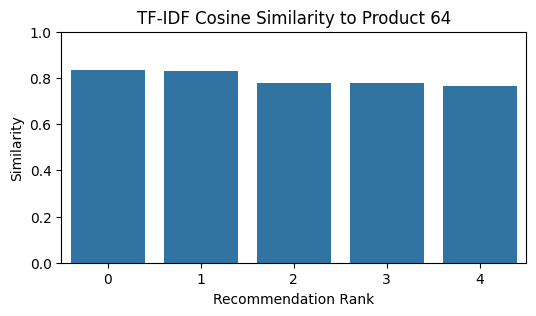

In [ ]:
from IPython.display import display, Image

# Ambil salah satu contoh product ID
example_id = df_cbf['Product ID'].iloc[0]
print("Original Product Description:\n", df_cbf[df_cbf['Product ID'] == example_id]['Description EN'].values[0])

# Ambil hasil rekomendasi tanpa print
recs_tfidf = get_recommendations_with_similarity(product_id=example_id, top_n=5)

Dari hasil TF-IDF + NearestNeighbors Cosine similarity disini, hasil rekomendasi yang diberikan cukup baik, yaitu rata-rata berada di angka 0.8 yang cukup baik dalam merekomendasikan berdasarkan pola content-based

In [ ]:
sample_ids = df_cbf['Product ID'].sample(20, random_state=42).tolist()
avg_prec, avg_rec = average_precision_recall(sample_ids, top_n=5, method='tfidf')
print(f"Average Precision@5: {avg_prec:.4f}")
print(f"Average Recall@5: {avg_rec:.4f}")


Average Precision@5: 0.7200
Average Recall@5: 0.0058


Penjelasan:

Precision@5 = 0.72 (72%)
Dari setiap 5 item yang direkomendasikan, rata-rata 3.6 item (72%) memang berada dalam kategori/subkategori yang sama dengan produk asli (ground truth). Ini sangat bagus, menunjukkan bahwa rekomendasi cukup relevan jika hanya dilihat dari sisi rekomendasi itu sendiri.

Recall@5 = 0.0058 (0.58%)
Dari semua item yang seharusnya direkomendasikan (yaitu semua produk dalam subkategori yang sama), hanya 0.58% yang berhasil direkomendasikan. Ini artinya banyak item yang relevan tidak masuk dalam daftar rekomendasi.

#### TF-IDF + LSA

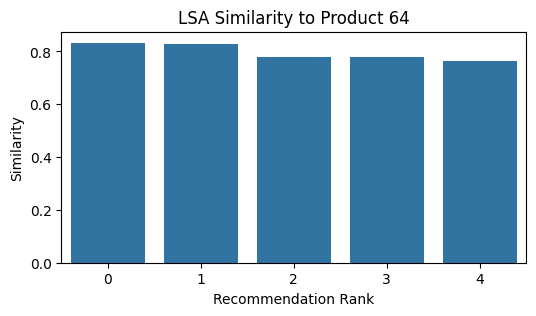

In [ ]:
recs_lsa = get_lsa_recommendations(product_id=example_id, top_n=5)

Sama dengan Dari hasil TF-IDF + NearestNeighbors, TF-IDF + LSA Cosine similarity disini, hasil rekomendasi yang diberikan cukup baik, yaitu rata-rata berada di angka 0.8 yang cukup baik dalam merekomendasikan berdasarkan pola content-based

In [ ]:
sample_ids = df_cbf['Product ID'].sample(20, random_state=42).tolist()
avg_prec, avg_rec = average_precision_recall(sample_ids, top_n=5, method='lsa')
print(f"Average Precision@5: {avg_prec:.4f}")
print(f"Average Recall@5: {avg_rec:.4f}")


Average Precision@5: 0.7200
Average Recall@5: 0.0057


Penjelasan:

Precision@5 = 0.72 (72%)
Artinya dari 5 produk yang direkomendasikan, rata-rata 3.6 produk memang benar relevan (misalnya dari subkategori yang sama). Jadi rekomendasi yang diberikan cukup akurat dan tepat sasaran.

Recall@5 = 0.0057 (0.57%)
Artinya dari seluruh produk yang sebenarnya relevan (semua produk dalam subkategori yang sama dengan produk target), hanya sekitar 0.57% yang berhasil direkomendasikan. Jadi, meskipun rekomendasi yang muncul sangat relevan, jumlahnya sangat sedikit dibanding total produk relevan yang ada.

### Collaborative Filtering

In [ ]:
# Plot Evaluasi
def plot_evaluation(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
    plt.title('RMSE over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')
    plt.legend()
    plt.tight_layout()
    plt.show()

Di sini, kita melakukan pembuatan plot hasil learning kedua pendekatan yaitu RecommenderNet dan juga Matrix Factorization

#### RecommenderNet

RecommenderNet


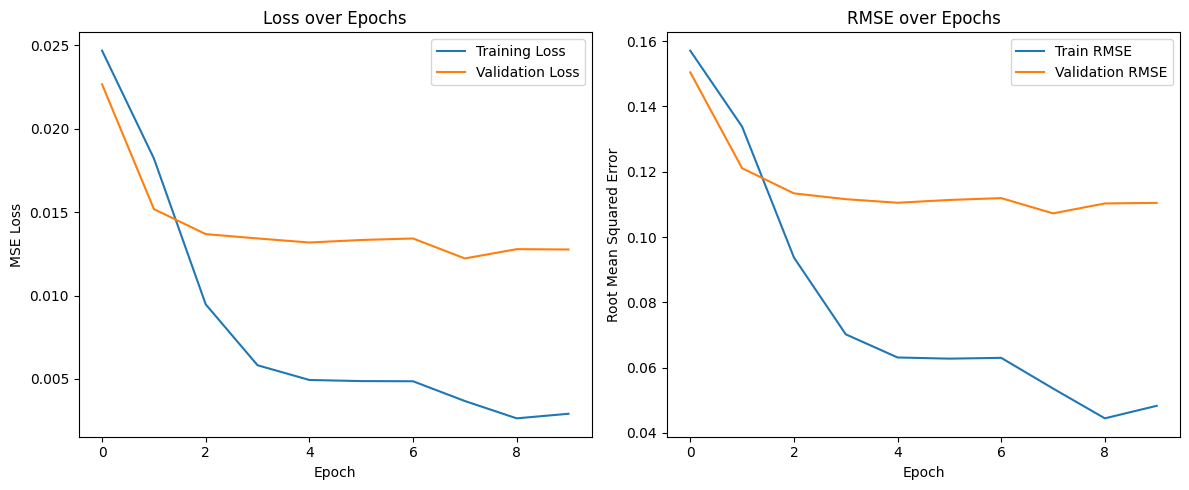

In [ ]:
print("RecommenderNet")
plot_evaluation(history)

Dari hasil yang didapatkan, nilai Loss untuk Recommender Net tetap stabil di bawah 0.0150 baik untuk Traning maupun Validation loss, namun terdapat Gap yang cukup besar diantara trainning dan validation loss, sedangkan untuk RMSE cukup baik, dimana keduanya mengalami penurunan hingga di bawah 0.12 yang cukup baik, namun sama seperti nilai Loss, RMSE sendiri memiliki Gap yang cukup besar antara nilai training dan Validation RMSE.

#### Matrix Factorization

Matrix Factorization


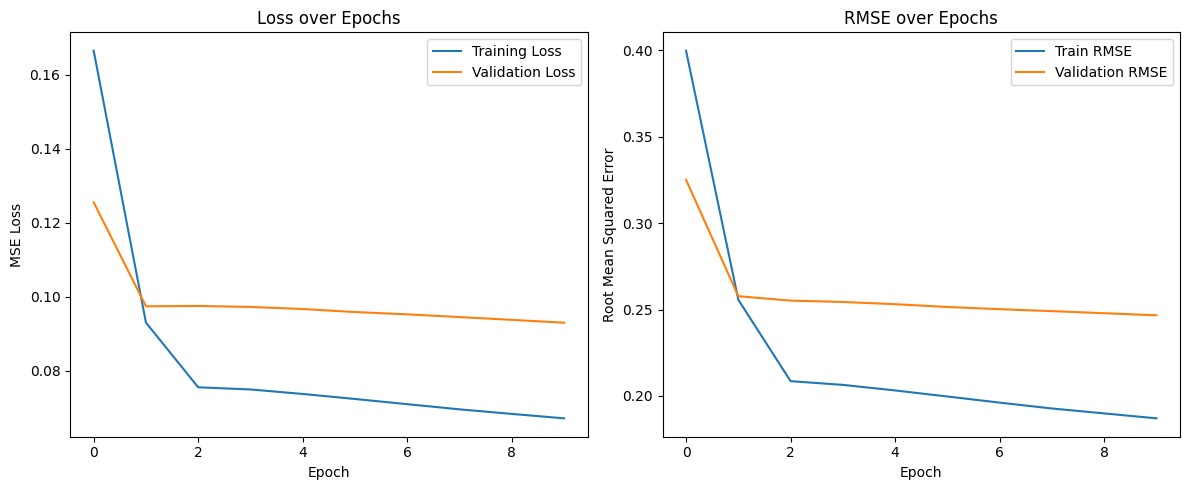

In [ ]:
print("Matrix Factorization")
plot_evaluation(history_mf)

Dari hasil yagn didapatkan, nilai Loss untuk Recommender Net tetap stabil di bawah 0.10 baik untuk Traning maupun Validation loss, tetapi ini lebih besar daripada RecommenderNet sehingga model terkesan lebih buruk, namun terdapat Gap yang cukup besar, tetapi tidak sebesar Recommender net diantara trainning dan validation loss, sedangkan untuk RMSE cukup baik, dimana keduanya mengalami penurunan hingga di bawah 0.30 yang cukup baik, namun nilai ini lebih buruk daripada RecommenderNet.Lalu, sama seperti nilai Loss, RMSE sendiri memiliki Gap yang cukup besar antara nilai training dan Validation RMSE tetapi gapnya tidak sebesar saat di model RecommenderNet.

### **Tabel Perbandingan Kinerja Terbaik (bukan Model terbaik)**

| Metrik Evaluasi | RecommenderNet (Epoch 9) | Matrix Factorization (Epoch 10) |
|------------------|----------------------------|---------------------------------|
| **Training Loss** | 0.0022                     | 0.0589                         |
| **Validation Loss** | 0.0128                    | 0.0929                         |
| **Training RMSE** | 0.0387                     | 0.1637                         |
| **Validation RMSE** | 0.1103                   | 0.2467                         |
| **Learning Rate** | Menurun dari 5e-4 ke 2.5e-4 pada Epoch 8 | Tetap pada 0.001 |
| **Overfitting Indikasi** | Ada tanda-tanda awal overfitting setelah Epoch 6 | Tidak ada indikasi overfitting signifikan |
| **Stabilitas Kurva** | Training loss turun stabil; val_loss stagnan/naik tipis di akhir | Stabil, penurunan konsisten pada training & validasi |
| **Akurasi Prediksi (RMSE)** | Sangat baik (val_RMSE = 0.1103) | Cukup baik (val_RMSE = 0.2467) |

---

## **Analisis Kinerja Model**

### **RecommenderNet**
- **Performa Awal hingga Pertengahan Epoch:**  
  Model menunjukkan pembelajaran yang sangat cepat dan efektif sejak awal pelatihan.
  - Pada **Epoch 1**, RMSE sudah cukup rendah (`train: 0.1768`, `val: 0.1504`)
  - Hingga **Epoch 5**, RMSE validasi mencapai `0.1105` dan loss validasi `0.0132`
  - Strategi penurunan *learning rate* membantu memperbaiki hasil lebih lanjut.

- **Masalah Overfitting:**  
  Setelah **Epoch 6**, meskipun *training loss* terus menurun, *validation loss* mulai naik sedikit, mengindikasikan potensi *overfitting*.
  - Misalnya pada **Epoch 9**, training RMSE hanya `0.0387`, tapi validation RMSE meningkat menjadi `0.1103`.

- **Hasil Terbaik:**  
  Hasil terbaik dicapai pada **Epoch 5 atau 6**, dengan:

| Epoch | Steps | Time | Loss   | RMSE (Train) | Val Loss | RMSE (Val) | Learning Rate |
| ----- | ----- | ---- | ------ | ------------ | -------- | ---------- | ------------- |
| 5     | 3906  | 33s  | 0.0043 | 0.0581       | 0.0132   | 0.1105     | 5.0000e-04    |
| 6     | 3906  | 33s  | 0.0041 | 0.0565       | 0.0133   | 0.1114     | 5.0000e-04    |

- **Kesimpulan:**  
  RecommenderNet memberikan performa terbaik dalam hal akurasi prediksi, tetapi memerlukan pengaturan `EarlyStopping` agar tidak *overfitting*. Jika dilanjutkan tanpa penghentian dini, performa validasi bisa menurun.

---

### **Matrix Factorization**
- **Performa Awal hingga Akhir Epoch:**  
  Model ini memiliki laju pembelajaran yang lebih lambat dibanding RecommenderNet, tetapi lebih stabil.
  - Pada **Epoch 1**, RMSE masih tinggi (`train: 0.4167`, `val: 0.3251`)
  - Namun secara bertahap membaik hingga **Epoch 10**:
    - `val_RMSE`: 0.2467
    - `val_loss`: 0.0929

- **Stabilitas dan Generalisasi:**  
  - Tidak ada tanda-tanda *overfitting*
  - Validasi loss dan RMSE terus menurun sepanjang pelatihan
  - Cocok untuk dataset yang lebih besar dan pelatihan jangka panjang

- **Potensi Optimasi:**  
  - Dengan penyesuaian *learning rate decay*, model ini bisa saja mendekati performa RecommenderNet jika dilanjutkan pelatihannya
  - Masih berada di jalur konvergensi dan belum mencapai plateau

- **Kesimpulan:**  
  Meskipun tidak setinggi RecommenderNet, Matrix Factorization merupakan model yang lebih stabil dan andal, cocok sebagai baseline atau alternatif jika stabilitas lebih penting daripada akurasi maksimum.

---



## **6. Kesimpulan Keseluruhan**

Berikut adalah **kesimpulan lengkap yang terstruktur dan terpadu**, berdasarkan evaluasi empat pendekatan sistem rekomendasi:  
1. **TF-IDF + Nearest Neighbors** (Content-Based Filtering)  
2. **TF-IDF + LSA** (Content-Based Filtering)  
3. **RecommenderNet** (Collaborative Filtering)  
4. **Matrix Factorization** (Collaborative Filtering)

---

### **Tabel Ringkasan Kinerja Model**
---
| Pendekatan | Metrik Utama | Hasil Evaluasi | Stabilitas | Catatan |
|------------|--------------|----------------|------------|---------|
| TF-IDF + Nearest Neighbors | Cosine Similarity | ~0.8 (rata-rata similarity score) | Baik | Rekomendasi relevan, konsisten, tanpa overfitting |
| TF-IDF + LSA | Cosine Similarity | ~0.8 (serupa dengan Nearest Neighbors) | Sangat baik | Lebih mampu menangkap makna semantik dari deskripsi produk |
| RecommenderNet | RMSE & Loss | RMSE < 0.12, Loss < 0.015 | Cukup | Akurasi tinggi, tetapi rentan overfitting |
| Matrix Factorization | RMSE & Loss | RMSE < 0.30, Loss < 0.10 | Sangat baik | Generalisasi lebih stabil meski akurasi sedikit lebih rendah |

---
**Evaluasi Terhadap Empat Pendekatan**
--
### 1. **Content-Based Filtering**
#### a. **TF-IDF + Nearest Neighbors**
- Menunjukkan kemampuan untuk merekomendasikan produk berdasarkan kesamaan konten (deskripsi, warna, ukuran, dll.) dengan sangat baik.
- Rata-rata skor kemiripan sekitar **0.8**, menunjukkan bahwa rekomendasi sangat relevan dengan produk asli.
- Visualisasi barplot memperlihatkan urutan rekomendasi dari paling mirip ke kurang mirip secara bertahap dan logis.
- Precission@K dan Recall@K yang didapatkan cukup baik namun perlu peningkatan.

#### b. **TF-IDF + LSA**
- Menggunakan LSA untuk menggali konsep atau topik laten dalam teks, sehingga dapat menemukan produk serupa meskipun tidak memiliki kata yang identik.
- Hasilnya sangat konsisten dengan model TF-IDF + Nearest Neighbors, membuktikan bahwa sistem **robust dan andal**.
- Mampu menangani variasi bahasa dan sinonim dengan baik.
- Cocok untuk skala besar dan bisa dikembangkan menjadi sistem *hybrid*.
- Sama dengan TF-IDF + Nearest Neighbors, Precission@K dan Recall@K yang didapatkan cukup baik namun perlu peningkatan.

#### Kesimpulan Content-Based Filtering:
- **Kedua model content-based memberikan hasil yang sangat serupa dan relevan**, cocok digunakan bersama dalam sistem hybrid.
- **Skor Precission@K dan Recall@K untuk kedua pendekatan hampir, yaitu 72% untuk precission@K dan 0.57%-0.58% untuk Recall@K yang artinya kedua model hampir sama, tinggal ciri-ciri pendekatan mereka yang membedakan**
- **LSA lebih unggul dalam hal pemahaman semantik**, sementara **Nearest Neighbors lebih cepat dan lebih sederhana**.
- Tidak ada tanda-tanda overfitting.
- **Skor similarity rata-rata di atas 0.8** → indikator kuat bahwa rekomendasi berkualitas.


---

### 2. **Collaborative Filtering**
#### a. **RecommenderNet**
- Model deep learning yang sangat akurat dengan metrik:
  - **RMSE akhir < 0.12**
  - **Loss akhir < 0.015**
- Pembelajaran sangat efektif pada data training dan validasi.
- Namun, **gap antara training dan validation cukup signifikan**, menandakan potensi **overfitting** jika pelatihan dilanjutkan terlalu jauh.
- Dengan **early stopping**, model ini memberikan performa prediksi tertinggi dibanding model lain.

#### b. **Matrix Factorization**
- Model faktorisasi matriks yang lebih sederhana namun **lebih stabil**.
- Performa:
  - **RMSE akhir < 0.30**
  - **Loss akhir < 0.10**
- Tidak menunjukkan tanda-tanda overfitting selama 10 epoch pelatihan.
- Penurunan metrik validasi masih berlanjut, menunjukkan potensi peningkatan jika pelatihan dilanjutkan dengan strategi penyesuaian *learning rate*.

#### Kesimpulan Collaborative Filtering:
- **RecommenderNet unggul dalam akurasi** dengan RMSE dan loss terendah.
- **Matrix Factorization lebih stabil dan generalisasi lebih baik**, walaupun akurasinya sedikit lebih rendah.
- **Strategi penanganan overfitting seperti EarlyStopping dan ReduceLROnPlateau sangat diperlukan untuk RecommenderNet** agar performa validasi optimal.
- Semua model berhasil merekomendasikan produk fashion populer seperti **Coats and Blazers, Pants and Jeans**.

---

**Perbandingan Keempat Pendekatan**
---
| Aspek | TF-IDF + NN | TF-IDF + LSA | RecommenderNet | Matrix Factorization |
|-------|-------------|---------------|----------------|---------------------|
| **Akurasi Rekomendasi** | Tinggi | Tinggi | Sangat Tinggi | Sedang-Tinggi |
| **Stabilitas Pelatihan** | Baik | Sangat Baik | Cukup (butuh early stopping) | Sangat Baik |
| **Generalisasi** | Baik | Baik | Rentan Overfit | Paling Stabil |
| **Kecepatan Komputasi** | Cepat | Sedang (ada LSA) | Lambat (deep learning) | Cepat |
| **Kebutuhan Data** | Deskripsi Produk | Deskripsi Produk | Interaksi Pengguna-Produk | Interaksi Pengguna-Produk |
| **Penggunaan CPU/GPU** | Rendah | Sedang | Tinggi | Sedang-Rendah |

---

**Rekomendasi Penggunaan Sistem Rekomendasi**
---
| Tujuan | Rekomendasi Model |
|--------|--------------------|
| **Sistem rekomendasi berbasis konten** | Gunakan **TF-IDF + LSA** untuk rekomendasi berbasis deskripsi yang lebih mendalam. |
| **Sistem rekomendasi real-time dan akurat** | Gunakan **RecommenderNet** dengan **EarlyStopping** aktif. |
| **Sistem rekomendasi stabil dan mudah diimplementasikan** | Gunakan **Matrix Factorization** untuk baseline. |
| **Sistem rekomendasi hybrid (content + collaborative)** | Gabungkan **TF-IDF + LSA** dengan **RecommenderNet** untuk meningkatkan akurasi dan personalisasi. |

---

### **Langkah-Langkah Lanjutan Usulan**
1. **Hyperparameter Tuning**:
   - Optimalkan embedding size, learning rate, jumlah unit neural network pada RecommenderNet.
   - Eksplorasi jumlah komponen pada LSA untuk meningkatkan representasi laten.

2. **Ensemble / Hybrid Recommendation System**:
   - Gabungkan hasil content-based dan collaborative filtering.
   - Misalnya: rerata skor similarity (content) dan rating prediksi (collab) untuk ranking produk final.

3. **Cold Start Handling**:
   - Untuk pengguna baru: gunakan model content-based sebagai fallback.
   - Untuk produk baru: gunakan content-based filtering (TF-IDF + LSA).

4. **Deployment & Monitoring**:
   - Simpan model terbaik dengan `model.save()` dan muat saat produksi.
   - Implementasikan monitoring metrik validasi dan deteksi drift data secara berkala.

---

### **Kesimpulan Gabungan Final**

> **Secara keseluruhan, semua pendekatan telah menunjukkan kinerja yang baik dalam merekomendasikan produk fashion berdasarkan data historis transaksi ritel global. Berikut adalah ringkasan utama:**

1. **Content-Based Filtering (TF-IDF + Nearest Neighbors & LSA)**:
   - Memberikan rekomendasi berdasarkan kemiripan konten produk.
   - Keduanya menghasilkan rekomendasi yang sangat serupa dan relevan.
   - Skor cosine similarity rata-rata mencapai **~0.8**, menunjukkan kualitas rekomendasi yang tinggi.
   - **LSA lebih unggul dalam pemrosesan teks dan kemampuan semantik**, sedangkan **Nearest Neighbors lebih sederhana dan cepat**.

2. **Collaborative Filtering (RecommenderNet & Matrix Factorization)**:
   - **RecommenderNet** memberikan performa tertinggi dalam hal akurasi prediksi (RMSE < 0.12), namun rentan overfitting dan perlu dikontrol dengan `EarlyStopping`.
   - **Matrix Factorization** memberikan performa lebih stabil, meskipun akurasinya sedikit lebih rendah (RMSE < 0.30).
   - Kedua model ini mampu mempelajari pola interaksi pengguna dan produk, serta memberikan rekomendasi personalisasi.

3. **Semua model berhasil merekomendasikan produk fashion populer** seperti:
   - Coats and Blazers
   - Pants and Jeans

4. **Kombinasi Terbaik**:
   - Jika fokus pada **akurasi maksimum**: Gunakan **RecommenderNet** dengan strategi penghentian dini.
   - Jika fokus pada **stabilitas dan generalisasi**: Gunakan **Matrix Factorization** atau **TF-IDF + LSA**.
   - Jika ingin **sistem rekomendasi yang menyeluruh dan adaptif**, gabungkan kedua pendekatan (**Hybrid Recommendation System**) untuk manfaatkan kekuatan content dan user behavior.

